<a href="https://colab.research.google.com/github/shivanidhar29/CloudIoTRaspberry/blob/main/DupontAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import requests
import pandas as pd
myAPIkey ='5e44a5083ea7ed6ecada7c23e9f37dbe'
stock = 'AAPL'

balanceStatements = requests.get(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIkey}"
).json()
incomeStatements = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIkey}'
).json()
print(balanceStatements[:5])


[{'date': '2021-09-25', 'symbol': 'AAPL', 'reportedCurrency': 'USD', 'cik': '0000320193', 'fillingDate': '2021-10-29', 'acceptedDate': '2021-10-28 18:04:28', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 34940000000, 'shortTermInvestments': 27699000000, 'cashAndShortTermInvestments': 62639000000, 'netReceivables': 51506000000, 'inventory': 6580000000, 'otherCurrentAssets': 14111000000, 'totalCurrentAssets': 134836000000, 'propertyPlantEquipmentNet': 39440000000, 'goodwill': 0.0, 'intangibleAssets': 0.0, 'goodwillAndIntangibleAssets': 0.0, 'longTermInvestments': 127877000000, 'taxAssets': 0.0, 'otherNonCurrentAssets': 48849000000, 'totalNonCurrentAssets': 216166000000, 'otherAssets': 0.0, 'totalAssets': 351002000000, 'accountPayables': 54763000000, 'shortTermDebt': 15613000000, 'taxPayables': 0.0, 'deferredRevenue': 7612000000, 'otherCurrentLiabilities': 47493000000, 'totalCurrentLiabilities': 125481000000, 'longTermDebt': 109106000000, 'deferredRevenueNonCurrent': 0

In [94]:
FiveYearBalanceStatement=balanceStatements[:5]
FiveYearIncomeStatement=incomeStatements[:5]


In [95]:
profitability=[]
assetTurnOver=[]
capitalStructure=[]
returnOnEquitly=[]
dates=[]

for i in range(0,5):
  dates.append(FiveYearBalanceStatement[i]['date'])
  profitabilityValue=FiveYearIncomeStatement[i]['netIncome']/FiveYearIncomeStatement[i]['revenue']
  profitability.append(profitabilityValue)
  
  assetTurnOverValue=FiveYearIncomeStatement[i]['revenue']/FiveYearBalanceStatement[i]['totalAssets']
  assetTurnOver.append(assetTurnOverValue)
  
  capitalStructureValue= FiveYearBalanceStatement[i]['totalAssets']/FiveYearBalanceStatement[i]['totalStockholdersEquity']
  capitalStructure.append(capitalStructureValue)

  returnOnEquitlyValue=profitabilityValue*assetTurnOverValue*capitalStructureValue
  returnOnEquitly.append(returnOnEquitlyValue)


In [96]:
print(returnOnEquitly)

[1.5007132667617686, 0.878663585301275, 0.6106445053487755, 0.5556011834209078, 0.36070184338329087]


In [98]:
df=pd.DataFrame(columns=['date','profitability','assetTurnOver','capitalStructure','returnOnEquitly'])
df['date']=dates
df['profitability']=profitability
df['assetTurnOver']=assetTurnOver
df['capitalStructure']=capitalStructure
df['returnOnEquitly']=returnOnEquitly

print(df)

         date  profitability  assetTurnOver  capitalStructure  returnOnEquitly
0  2021-09-25       0.258818       1.042208          5.563512         1.500713
1  2020-09-26       0.209136       0.847562          4.957039         0.878664
2  2019-09-28       0.212381       0.768572          3.741004         0.610645
3  2018-09-29       0.224142       0.726215          3.413301         0.555601
4  2017-09-30       0.210924       0.610771          2.799906         0.360702


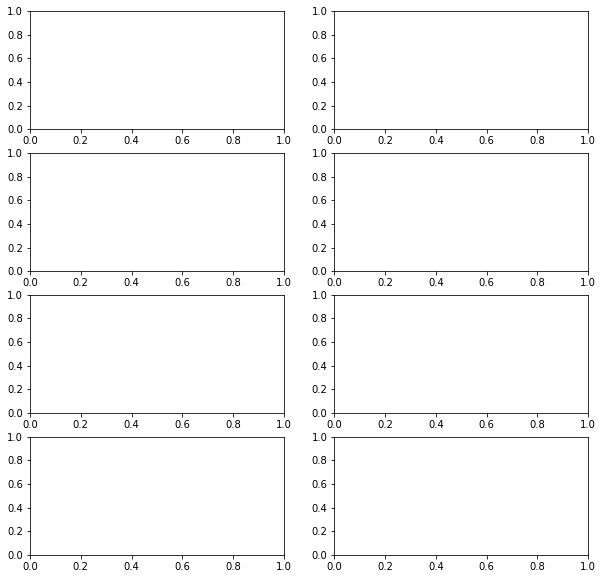

In [106]:
import matplotlib.pyplot as plt

fig, axs= plt.subplots(4,2, figsize=(10,10))
x=['date']
yValues=['profitability','assetTurnOver', 'capitalStructure', 'returnOnEquitly']

plt.show();

In [ ]:
fig, axs= plt.subplots(4,2, figsize=(10,10))
x=oct21USA['date']
#equivalently I could say x=oct21CAN['date']

#lists are indexed from 0 so yValues[0] gives you 'tests'
yValues=['tests','hosp', 'icu', 'deaths']

#range (0,4) gives you numbers 0,1,2,3
#range (0,2) gives you numbers 0,1
for row in range(0,4):
  for col in range(0,2):
    y=oct21USA[yValues[row]] if col==0 else oct21CAN[yValues[row]]
    yTitle='USA'+' '+yValues [row] if col==0 else 'CAN'+' '+yValues[row]
    axs[row,col].plot(x,y)
    axs[row,col].set_title(yTitle)
    fig.tight_layout()